In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model, Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import glob
import inspect


In [11]:
filenames= glob.glob('lfw/*/*.jpg')

In [12]:
all_imgs = []
# Load image files and Resize (h,w,ch) -> h = w < 100 , ch = 3 (R,G,B)
for file in filenames:
    img = image.load_img(file, target_size=(80,80), interpolation="nearest")

    # convert the image to an array

    img = image.img_to_array(img)

    # Normalized color image

    img = img/255

    all_imgs.append(img)

print(all_imgs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
all_images = np.array(all_imgs)

print(all_images.shape)

(3203, 80, 80, 3)


In [14]:
train_x, test_x = train_test_split(all_images, random_state=32, test_size=0.3)
train_x, val_x = train_test_split(train_x, random_state=32, test_size=0.3)

Text(0.5, 1.0, 'test_x')

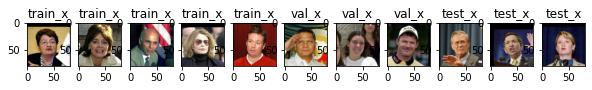

In [15]:
plt.figure(figsize=(10,4))
plt.subplot(1,11,1)
plt.imshow(train_x[0])
plt.title('train_x')
plt.subplot(1,11,2)
plt.imshow(train_x[1])
plt.title('train_x')
plt.subplot(1,11,3)
plt.imshow(train_x[2])
plt.title('train_x')
plt.subplot(1,11,4)
plt.imshow(train_x[3])
plt.title('train_x')
plt.subplot(1,11,5)
plt.imshow(train_x[4])
plt.title('train_x')
plt.subplot(1,11,6)
plt.imshow(val_x[0])
plt.title('val_x')
plt.subplot(1,11,7)
plt.imshow(val_x[1])
plt.title('val_x')
plt.subplot(1,11,8)
plt.imshow(val_x[2])
plt.title('val_x')
plt.subplot(1,11,9)
plt.imshow(test_x[0])
plt.title('test_x')
plt.subplot(1,11,10)
plt.imshow(test_x[1])
plt.title('test_x')
plt.subplot(1,11,11)
plt.imshow(test_x[2])
plt.title('test_x')

In [16]:
# Add Noise
# ก ําหนด noise factor (noise level)
# Add noise
# noise_factor = scalar between 0 -1 ลองอย่ํางน้อย 2 ค่ํา
noise_factor = 0.7
# ก ําหนด noise parameter
# Noise distribution: normal
# Noise mean: zero mean (Nmean = 0)
Nmean = 0
# Noise std: unit variance (Nstd = 1)
Nstd = 1
# use np.random.normal to generate normal distribution (gaussian) noise
x_train_noisy = train_x + (noise_factor * np.random.normal(loc=Nmean, scale=Nstd, size=train_x.shape) )
x_val_noisy = val_x + ( noise_factor * np.random.normal(loc=Nmean, scale=Nstd, size=val_x.shape) )
x_test_noisy = test_x + ( noise_factor * np.random.normal(loc=Nmean, scale=Nstd, size=test_x.shape) )

In [17]:
plt.figure(figsize=(20,8))
plt.subplot(1,11,1)
plt.imshow(x_train_noisy[0])
plt.title('train_x')
plt.subplot(1,11,2)
plt.imshow(x_train_noisy[1])
plt.title('train_x')
plt.subplot(1,11,3)
plt.imshow(x_train_noisy[2])
plt.title('train_x')
plt.subplot(1,11,4)
plt.imshow(x_train_noisy[3])
plt.title('train_x')
plt.subplot(1,11,5)
plt.imshow(x_train_noisy[4])
plt.title('train_x')
plt.subplot(1,11,6)
plt.imshow(x_val_noisy[0])
plt.title('val_x')
plt.subplot(1,11,7)
plt.imshow(x_val_noisy[1])
plt.title('val_x')
plt.subplot(1,11,8)
plt.imshow(x_val_noisy[2])
plt.title('val_x')
plt.subplot(1,11,9)
plt.imshow(x_test_noisy[0])
plt.title('val_x')
plt.subplot(1,11,10)
plt.imshow(x_test_noisy[1])
plt.title('val_x')
plt.subplot(1,11,11)
plt.imshow(x_test_noisy[2])
plt.title('val_x')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Text(0.5, 1.0, 'val_x')

In [18]:
noise_factor = 0.2
x_train_noisy = train_x + (noise_factor * np.random.normal(loc=Nmean, scale=Nstd, size=train_x.shape) )
x_val_noisy = val_x + ( noise_factor * np.random.normal(loc=Nmean, scale=Nstd, size=val_x.shape) )
x_test_noisy = test_x + ( noise_factor * np.random.normal(loc=Nmean, scale=Nstd, size=test_x.shape) )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Text(0.5, 1.0, 'val_x')

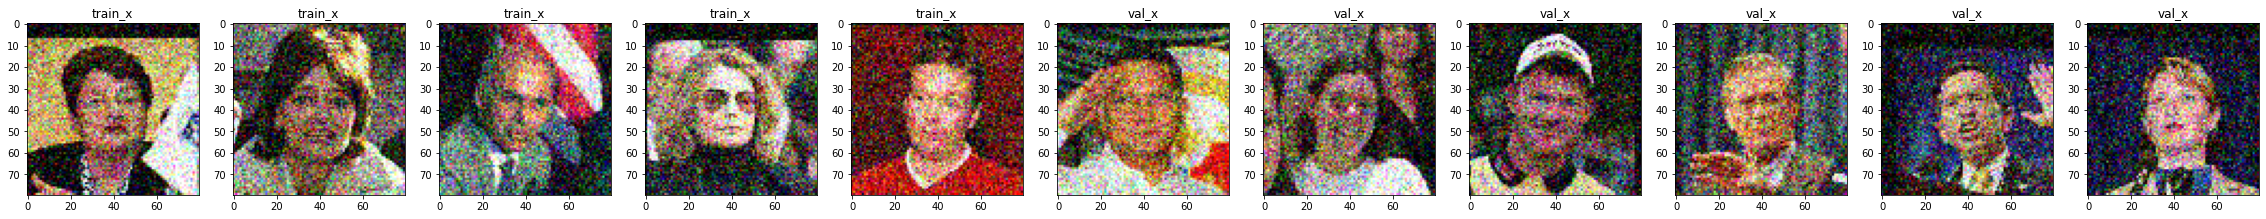

In [22]:
plt.figure(figsize=(40,24))
plt.subplot(1,11,1)
plt.imshow(x_train_noisy[0])
plt.title('train_x')
plt.subplot(1,11,2)
plt.imshow(x_train_noisy[1])
plt.title('train_x')
plt.subplot(1,11,3)
plt.imshow(x_train_noisy[2])
plt.title('train_x')
plt.subplot(1,11,4)
plt.imshow(x_train_noisy[3])
plt.title('train_x')
plt.subplot(1,11,5)
plt.imshow(x_train_noisy[4])
plt.title('train_x')
plt.subplot(1,11,6)
plt.imshow(x_val_noisy[0])
plt.title('val_x')
plt.subplot(1,11,7)
plt.imshow(x_val_noisy[1])
plt.title('val_x')
plt.subplot(1,11,8)
plt.imshow(x_val_noisy[2])
plt.title('val_x')
plt.subplot(1,11,9)
plt.imshow(x_test_noisy[0])
plt.title('val_x')
plt.subplot(1,11,10)
plt.imshow(x_test_noisy[1])
plt.title('val_x')
plt.subplot(1,11,11)
plt.imshow(x_test_noisy[2])
plt.title('val_x')


In [13]:
# ก ําหนด Encoder Architecture
Input_img = Input(shape=(80, 80, 3))
#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

In [14]:
# ก ําหนด Decoder Architecture
# decoding architecture
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)

In [15]:
# ก ําหนด optimizer setting
autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')# -> loss ใช้ Mean Square Error
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 80, 80, 256)       7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 128)       295040    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 64)        36928     
                                                             

In [16]:
# เริ่มกําร training
callbacks_model = EarlyStopping()
history = autoencoder.fit (x_train_noisy, train_x,
epochs=2,
batch_size=32,
shuffle=True,
validation_data=(x_val_noisy, val_x),callbacks = [callbacks_model])

Epoch 1/2
50/50 [==============================] - 188s 4s/step - loss: 0.0803 - val_loss: 0.0183
Epoch 2/2
50/50 [==============================] - 186s 4s/step - loss: 0.0124 - val_loss: 0.0076


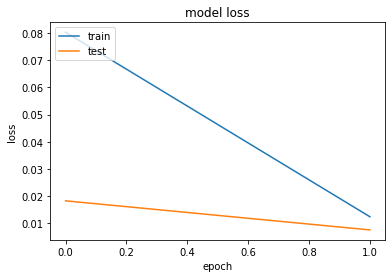

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
predictions = autoencoder.predict(x_val_noisy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Text(0.5, 1.0, 'predictions')

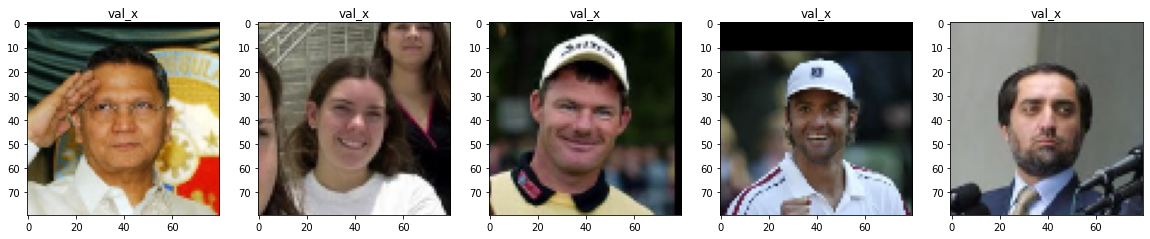

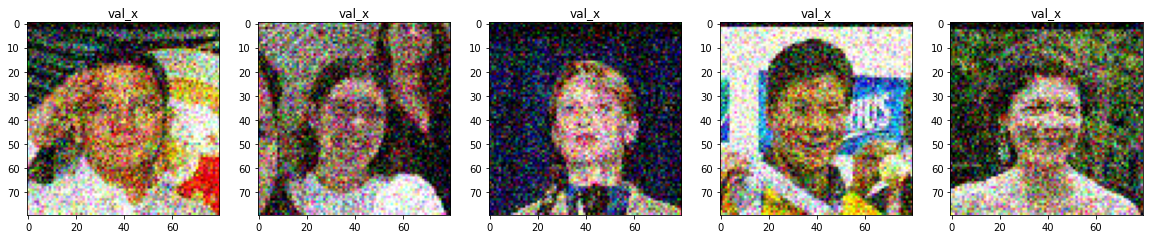

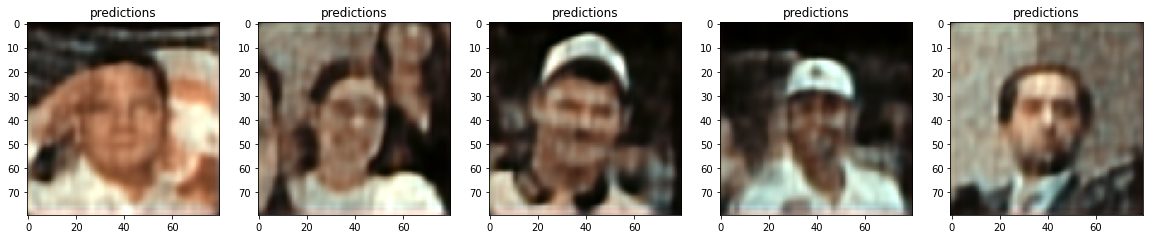

In [19]:
plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
plt.imshow(val_x[0])
plt.title('val_x')
plt.subplot(1,5,2)
plt.imshow(val_x[1])
plt.title('val_x')
plt.subplot(1,5,3)
plt.imshow(val_x[2])
plt.title('val_x')
plt.subplot(1,5,4)
plt.imshow(val_x[3])
plt.title('val_x')
plt.subplot(1,5,5)
plt.imshow(val_x[4])
plt.title('val_x')

plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
plt.imshow(x_val_noisy[0])
plt.title('val_x')
plt.subplot(1,5,2)
plt.imshow(x_val_noisy[1])
plt.title('val_x')
plt.subplot(1,5,3)
plt.imshow(x_test_noisy[2])
plt.title('val_x')
plt.subplot(1,5,4)
plt.imshow(x_test_noisy[3])
plt.title('val_x')
plt.subplot(1,5,5)
plt.imshow(x_test_noisy[4])
plt.title('val_x')

plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
plt.imshow(predictions[0])
plt.title('predictions')
plt.subplot(1,5,2)
plt.imshow(predictions[1])
plt.title('predictions')
plt.subplot(1,5,3)
plt.imshow(predictions[2])
plt.title('predictions')
plt.subplot(1,5,4)
plt.imshow(predictions[3])
plt.title('predictions')
plt.subplot(1,5,5)
plt.imshow(predictions[4])
plt.title('predictions')

In [21]:
predictions = autoencoder.predict(x_test_noisy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Text(0.5, 1.0, 'predictions')

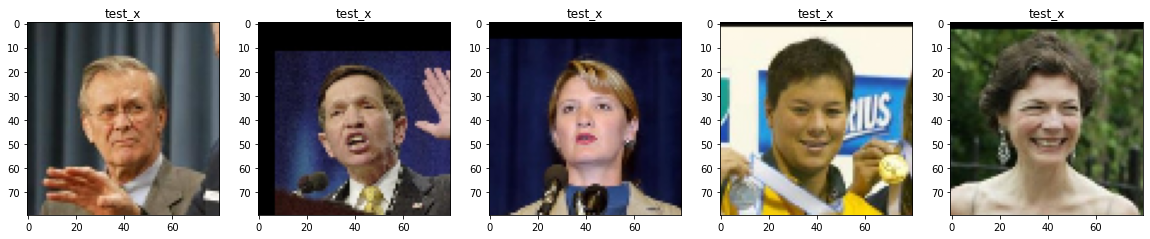

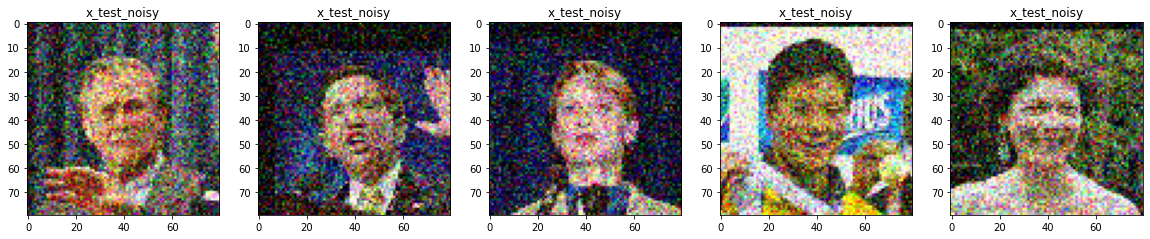

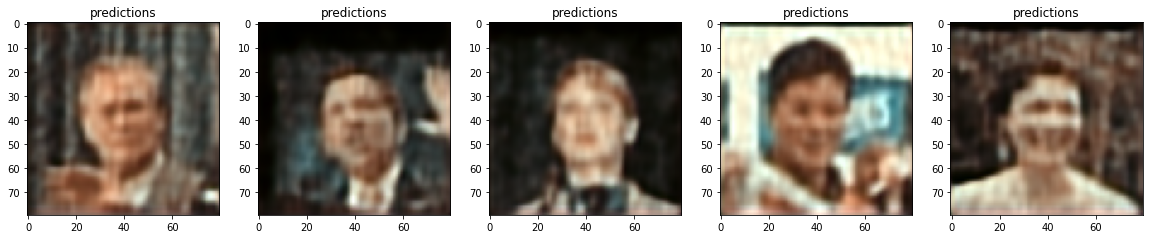

In [25]:
plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
plt.imshow(test_x[0])
plt.title('test_x')
plt.subplot(1,5,2)
plt.imshow(test_x[1])
plt.title('test_x')
plt.subplot(1,5,3)
plt.imshow(test_x[2])
plt.title('test_x')
plt.subplot(1,5,4)
plt.imshow(test_x[3])
plt.title('test_x')
plt.subplot(1,5,5)
plt.imshow(test_x[4])
plt.title('test_x')

plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
plt.imshow(x_test_noisy[0])
plt.title('x_test_noisy')
plt.subplot(1,5,2)
plt.imshow(x_test_noisy[1])
plt.title('x_test_noisy')
plt.subplot(1,5,3)
plt.imshow(x_test_noisy[2])
plt.title('x_test_noisy')
plt.subplot(1,5,4)
plt.imshow(x_test_noisy[3])
plt.title('x_test_noisy')
plt.subplot(1,5,5)
plt.imshow(x_test_noisy[4])
plt.title('x_test_noisy')

plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
plt.imshow(predictions[0])
plt.title('predictions')
plt.subplot(1,5,2)
plt.imshow(predictions[1])
plt.title('predictions')
plt.subplot(1,5,3)
plt.imshow(predictions[2])
plt.title('predictions')
plt.subplot(1,5,4)
plt.imshow(predictions[3])
plt.title('predictions')
plt.subplot(1,5,5)
plt.imshow(predictions[4])
plt.title('predictions')

In [26]:
# เริ่มกําร training
callbacks_model = EarlyStopping()
history = autoencoder.fit (x_train_noisy, train_x,
epochs=4,
batch_size=32,
shuffle=True,
validation_data=(x_val_noisy, val_x),callbacks = [callbacks_model])

Epoch 1/4
50/50 [==============================] - 186s 4s/step - loss: 0.0067 - val_loss: 0.0068
Epoch 2/4
50/50 [==============================] - 192s 4s/step - loss: 0.0055 - val_loss: 0.0051


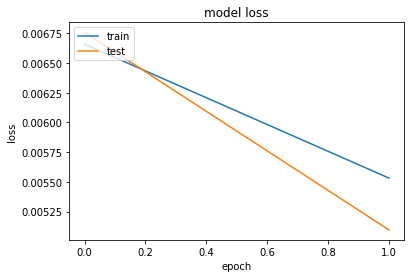

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
predictions = autoencoder.predict(x_val_noisy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Text(0.5, 1.0, 'predictions')

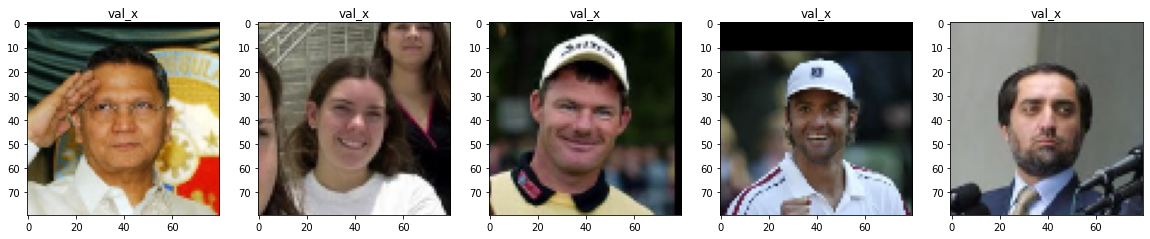

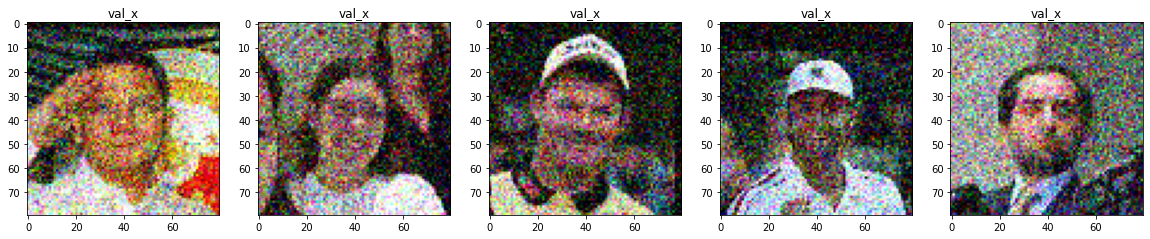

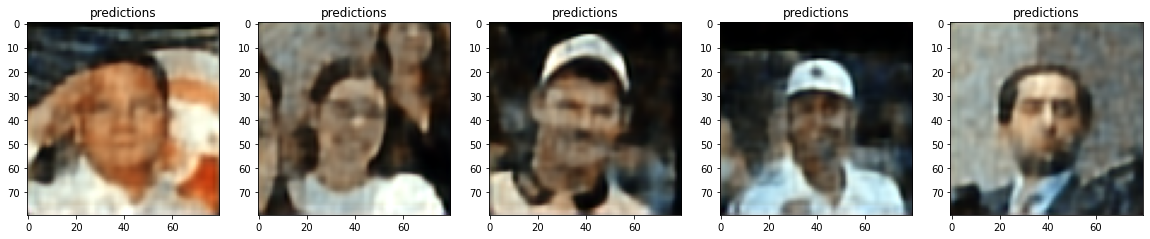

In [29]:
plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
plt.imshow(val_x[0])
plt.title('val_x')
plt.subplot(1,5,2)
plt.imshow(val_x[1])
plt.title('val_x')
plt.subplot(1,5,3)
plt.imshow(val_x[2])
plt.title('val_x')
plt.subplot(1,5,4)
plt.imshow(val_x[3])
plt.title('val_x')
plt.subplot(1,5,5)
plt.imshow(val_x[4])
plt.title('val_x')

plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
plt.imshow(x_val_noisy[0])
plt.title('val_x')
plt.subplot(1,5,2)
plt.imshow(x_val_noisy[1])
plt.title('val_x')
plt.subplot(1,5,3)
plt.imshow(x_val_noisy[2])
plt.title('val_x')
plt.subplot(1,5,4)
plt.imshow(x_val_noisy[3])
plt.title('val_x')
plt.subplot(1,5,5)
plt.imshow(x_val_noisy[4])
plt.title('val_x')

plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
plt.imshow(predictions[0])
plt.title('predictions')
plt.subplot(1,5,2)
plt.imshow(predictions[1])
plt.title('predictions')
plt.subplot(1,5,3)
plt.imshow(predictions[2])
plt.title('predictions')
plt.subplot(1,5,4)
plt.imshow(predictions[3])
plt.title('predictions')
plt.subplot(1,5,5)
plt.imshow(predictions[4])
plt.title('predictions')

In [30]:
predictions = autoencoder.predict(x_test_noisy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Text(0.5, 1.0, 'predictions')

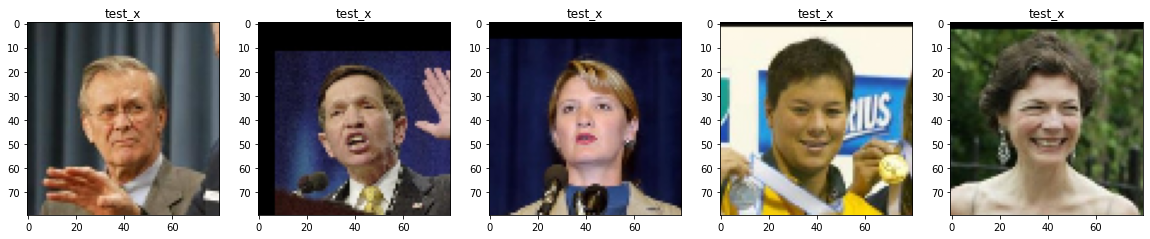

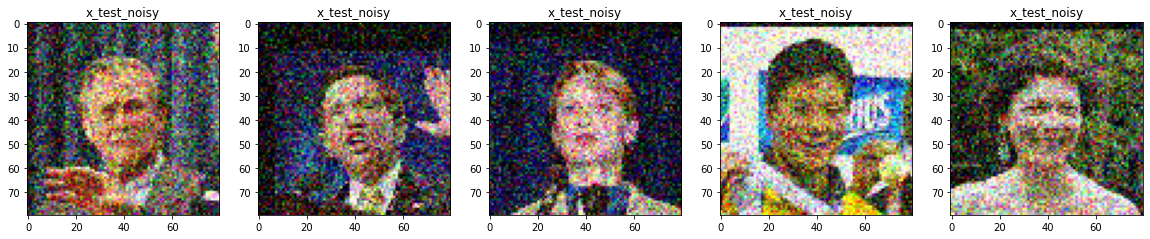

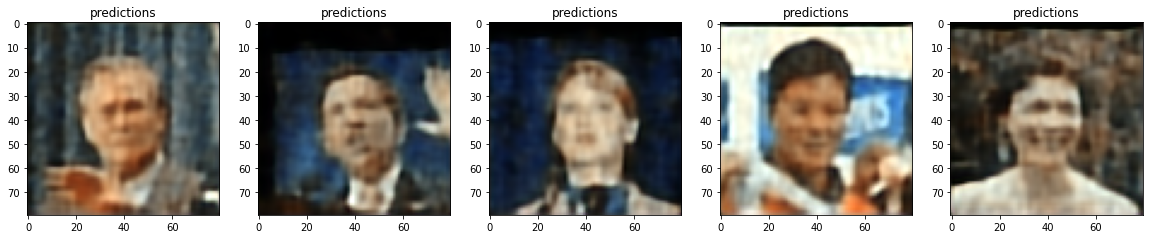

In [31]:
plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
plt.imshow(test_x[0])
plt.title('test_x')
plt.subplot(1,5,2)
plt.imshow(test_x[1])
plt.title('test_x')
plt.subplot(1,5,3)
plt.imshow(test_x[2])
plt.title('test_x')
plt.subplot(1,5,4)
plt.imshow(test_x[3])
plt.title('test_x')
plt.subplot(1,5,5)
plt.imshow(test_x[4])
plt.title('test_x')

plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
plt.imshow(x_test_noisy[0])
plt.title('x_test_noisy')
plt.subplot(1,5,2)
plt.imshow(x_test_noisy[1])
plt.title('x_test_noisy')
plt.subplot(1,5,3)
plt.imshow(x_test_noisy[2])
plt.title('x_test_noisy')
plt.subplot(1,5,4)
plt.imshow(x_test_noisy[3])
plt.title('x_test_noisy')
plt.subplot(1,5,5)
plt.imshow(x_test_noisy[4])
plt.title('x_test_noisy')

plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
plt.imshow(predictions[0])
plt.title('predictions')
plt.subplot(1,5,2)
plt.imshow(predictions[1])
plt.title('predictions')
plt.subplot(1,5,3)
plt.imshow(predictions[2])
plt.title('predictions')
plt.subplot(1,5,4)
plt.imshow(predictions[3])
plt.title('predictions')
plt.subplot(1,5,5)
plt.imshow(predictions[4])
plt.title('predictions')